<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# Classification Models with Keras

Estimated time needed: **30** mins


## Introduction


In this lab, we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change. 

The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

Also, this way, you will get to compare how conventional neural networks compare to convolutional neural networks, that we will build in the next module.


## Objectives for this Notebook    
* Use the MNIST database for training various image processing systems
* Build a neural network
* Train and test the network


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#Import-Keras-and-Packages">Import Keras and Packages</a>      
2. <a href="#Build-a-Neural-Network">Build a Neural Network</a>     
3. <a href="#Train-and-Test-the-Network">Train and Test the Network</a>     

</font>
</div>


Let's start by installing Keras and other necessary libraries.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [29]:
# !pip install tensorflow_cpu==2.18.0
# !pip install matplotlib==3.9.2

# print("==== All required libraries are installed =====")

#### Suppress the tensorflow warning messages
We use the following code to  suppress the warning messages due to use of CPU architechture for tensoflow.

You may want to **comment out** these lines if you are using the GPU architechture


In [30]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import Keras and Packages


### Import the libraries. 
There might be some warning messages related to floating point round off errors and lack of GPU and other compiler related options. You can ignore these warnings and proceed.


In [31]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.


In [32]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [33]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [34]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


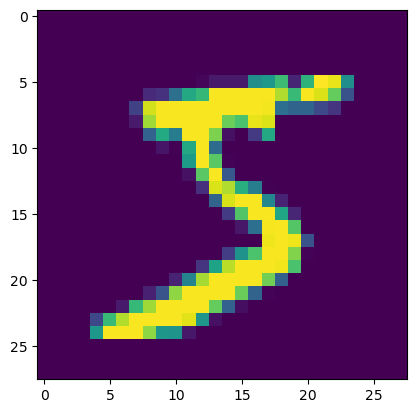

In [35]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [36]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [37]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [38]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [39]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [40]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 55s - 29ms/step - accuracy: 0.8009 - loss: 4.5469 - val_accuracy: 0.7841 - val_loss: 12.2634
Epoch 2/10
1875/1875 - 55s - 29ms/step - accuracy: 0.7825 - loss: 22.3486 - val_accuracy: 0.7111 - val_loss: 51.7289
Epoch 3/10
1875/1875 - 36s - 19ms/step - accuracy: 0.7880 - loss: 43.1223 - val_accuracy: 0.8456 - val_loss: 32.8401
Epoch 4/10
1875/1875 - 36s - 19ms/step - accuracy: 0.7881 - loss: 70.5958 - val_accuracy: 0.7721 - val_loss: 109.5181
Epoch 5/10
1875/1875 - 35s - 19ms/step - accuracy: 0.7884 - loss: 107.1488 - val_accuracy: 0.7708 - val_loss: 151.1157
Epoch 6/10
1875/1875 - 35s - 19ms/step - accuracy: 0.7980 - loss: 135.0995 - val_accuracy: 0.7912 - val_loss: 167.6042
Epoch 7/10
1875/1875 - 37s - 19ms/step - accuracy: 0.7964 - loss: 173.5661 - val_accuracy: 0.8364 - val_loss: 133.4150
Epoch 8/10
1875/1875 - 45s - 24ms/step - accuracy: 0.7973 - loss: 221.1133 - val_accuracy: 0.8391 - val_loss: 159.8126
Epoch 9/10
1875/1875 - 49s - 26ms/step - accuracy: 0.797

Let's print the accuracy and the corresponding error.


In [41]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.8407999873161316% 
 Error: 0.1592000126838684


Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [42]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


When you are ready to use your model again, you use the load_model function from <strong>keras.saving</strong>.


In [43]:
pretrained_model = keras.saving.load_model('classification_model.keras')

<h3>Practice Exercise 1</h3>


Create a neural network model with 6 dense layers and compare its accuracy


In [44]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)


Epoch 1/10
1875/1875 - 33s - 18ms/step - accuracy: 0.3485 - loss: 2534689.7500 - val_accuracy: 0.1193 - val_loss: 16597934.0000
Epoch 2/10
1875/1875 - 29s - 15ms/step - accuracy: 0.1734 - loss: 140554784.0000 - val_accuracy: 0.1756 - val_loss: 490230784.0000
Epoch 3/10
1875/1875 - 27s - 15ms/step - accuracy: 0.1709 - loss: 988392768.0000 - val_accuracy: 0.1140 - val_loss: 2028264320.0000
Epoch 4/10
1875/1875 - 27s - 15ms/step - accuracy: 0.1634 - loss: 3297515008.0000 - val_accuracy: 0.2145 - val_loss: 5773996032.0000
Epoch 5/10
1875/1875 - 29s - 16ms/step - accuracy: 0.1644 - loss: 8657226752.0000 - val_accuracy: 0.2052 - val_loss: 7709465600.0000
Epoch 6/10
1875/1875 - 32s - 17ms/step - accuracy: 0.1611 - loss: 19482693632.0000 - val_accuracy: 0.1676 - val_loss: 20812357632.0000
Epoch 7/10
1875/1875 - 35s - 19ms/step - accuracy: 0.1611 - loss: 35871948800.0000 - val_accuracy: 0.1280 - val_loss: 58847690752.0000
Epoch 8/10
1875/1875 - 35s - 19ms/step - accuracy: 0.1593 - loss: 6153402

In [45]:

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[161990279168.0, 0.15469999611377716]

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
def classification_model_6layers():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))   

-->


<h3>Practice Exercise 2</h3>


Now, load the the earlier saved model, train it further for 10 more epochs and check the accuracy


In [48]:
og_model = keras.saving.load_model('classification_model.keras')

og_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)



Epoch 1/10
1875/1875 - 36s - 19ms/step - accuracy: 0.7958 - loss: 385.3818 - val_accuracy: 0.8147 - val_loss: 451.4189
Epoch 2/10
1875/1875 - 37s - 20ms/step - accuracy: 0.8008 - loss: 432.3582 - val_accuracy: 0.7964 - val_loss: 486.5971
Epoch 3/10
1875/1875 - 38s - 20ms/step - accuracy: 0.8027 - loss: 476.7915 - val_accuracy: 0.7667 - val_loss: 490.5805
Epoch 4/10
1875/1875 - 39s - 21ms/step - accuracy: 0.8042 - loss: 550.3602 - val_accuracy: 0.7782 - val_loss: 729.1696
Epoch 5/10
1875/1875 - 48s - 26ms/step - accuracy: 0.8068 - loss: 610.1752 - val_accuracy: 0.8115 - val_loss: 641.1108
Epoch 6/10
1875/1875 - 49s - 26ms/step - accuracy: 0.8040 - loss: 698.1955 - val_accuracy: 0.8245 - val_loss: 723.1681
Epoch 7/10
1875/1875 - 37s - 20ms/step - accuracy: 0.8044 - loss: 781.5552 - val_accuracy: 0.8110 - val_loss: 849.5106
Epoch 8/10
1875/1875 - 38s - 20ms/step - accuracy: 0.8013 - loss: 884.7484 - val_accuracy: 0.8143 - val_loss: 880.8869
Epoch 9/10
1875/1875 - 60s - 32ms/step - accurac

In [50]:
scores = og_model.evaluate(X_test, y_test, verbose=0)
scores

[749.7765502929688, 0.8370000123977661]

Double-click <b>here</b> for the solution.

<!-- Your answer is below:

#load the saved model
pretrained_model = keras.saving.load_model('classification_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))   

-->


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  |   Aman   |  Updated the library versions to current |
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>

